In [1]:
#!pip install graphviz

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split
import graphviz

from sklearn.metrics import accuracy_score
#from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Decision Tree algorithm with Gini Index

In [3]:
iris = load_iris()
df = iris.copy()
X, y = iris.data, iris.target
X.shape, y.shape

((150, 4), (150,))

In [4]:
#split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112,), (38,))

In [5]:
clf_gini = DecisionTreeClassifier(criterion='gini',random_state=40) #created dtc model with randomizing data
clf_gini = clf_gini.fit(X_train, y_train) #model trained

In [6]:
y_pred_gini = clf_gini.predict(X_test)
y_pred_gini

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0])

In [7]:
acc_score_gini = accuracy_score(y_test, y_pred_gini) #accuracy score between real data and predicted data
print("Model accuracy score (Gini Index):", str(acc_score_gini))

Model accuracy score (Gini Index): 0.9736842105263158


In [8]:
training_set_score= clf_gini.score(X_train, y_train)
test_set_score = clf_gini.score(X_test, y_test)

print("Training set score: "+ str(training_set_score))
print("Test set score: "+ str(test_set_score))

Training set score: 1.0
Test set score: 0.9736842105263158


### Note:  *No significant difference was observed between Training set score and Test set score. Can't say it's overfitting* 

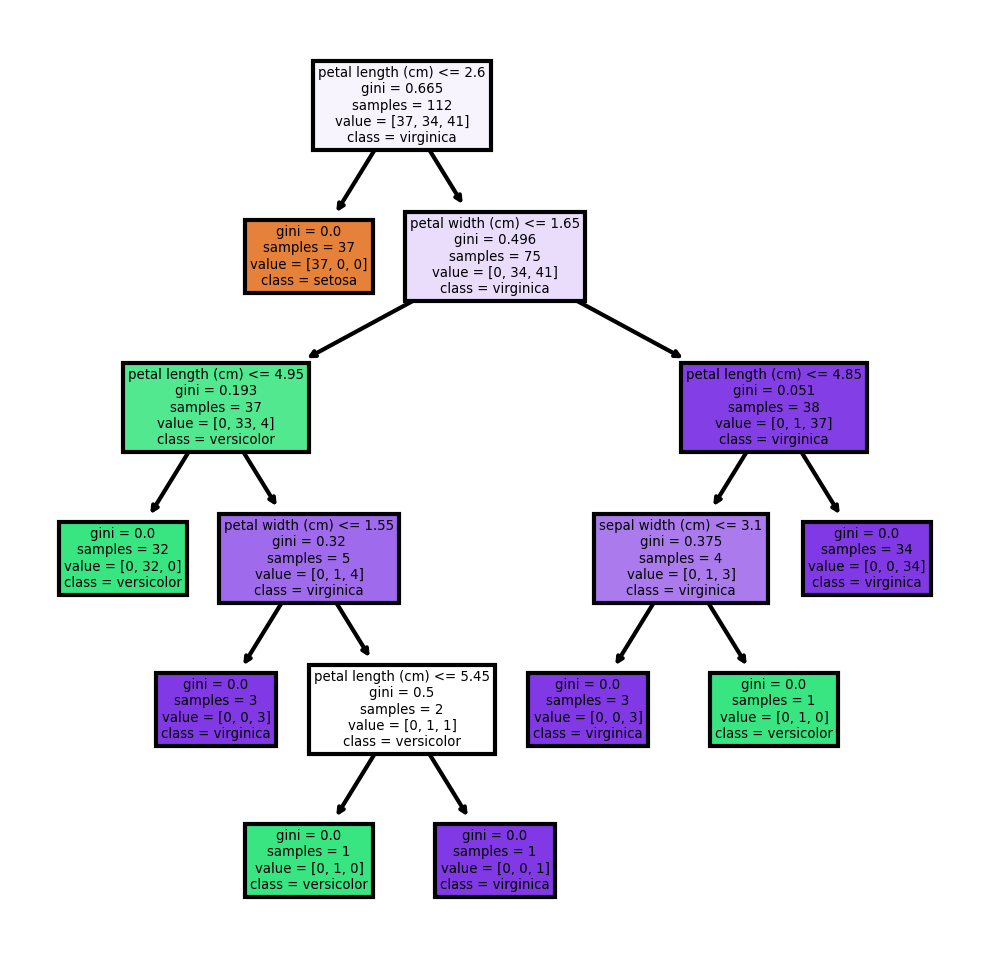

In [9]:
#created model was visualized
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf_gini,
               feature_names = iris.feature_names, 
               class_names=iris.target_names,
               filled = True);

tree.export_graphviz(clf_gini,
                     out_file="tree.dot",
                     feature_names = iris.feature_names, 
                     class_names=iris.target_names,
                     filled = True)

In [10]:
cmg = confusion_matrix(y_test, y_pred_gini)
cmg

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

In [11]:
print(classification_report(y_test, y_pred_gini,target_names=['setosa','versicolor','virginica']))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



# Decision Tree algorithm with Entropy

In [12]:
clf_en = DecisionTreeClassifier(criterion='entropy',random_state=10)
clf_en = clf_en.fit(X_train, y_train)

In [13]:
y_pred_en = clf_en.predict(X_test)

In [14]:
acc_score_en = accuracy_score(y_test, y_pred_en)
print("Model accuracy score (Entropy):", str(acc_score_en))

Model accuracy score (Entropy): 0.9736842105263158


In [15]:
y_pred_train_en = clf_en.predict(X_train)

In [16]:
training_set_score_en= clf_en.score(X_train, y_train)
test_set_score_en = clf_en.score(X_test, y_test)

print("Training set score: "+ str(training_set_score_en))
print("Test set score: "+ str(test_set_score_en))

Training set score: 1.0
Test set score: 0.9736842105263158


### Note:  *No significant difference was observed between Training set score and Test set score. Can't say it's overfitting* 

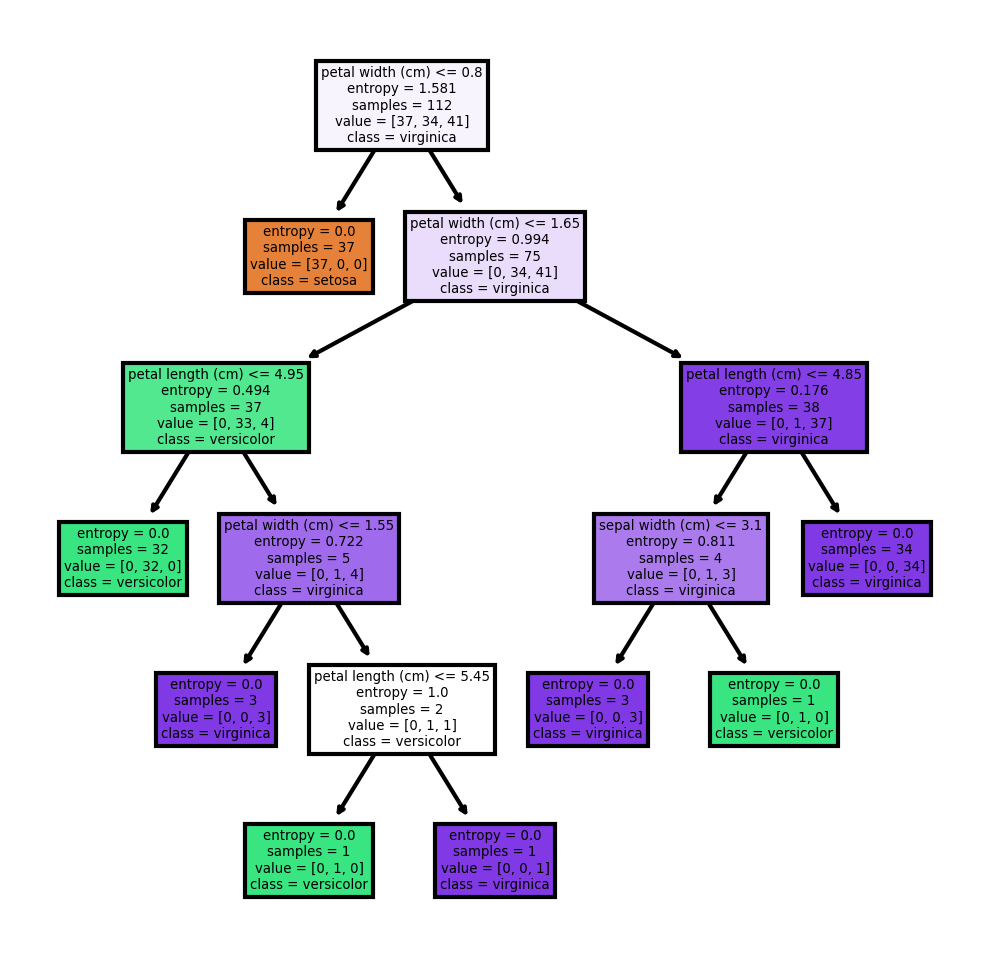

In [17]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf_en,
               feature_names = iris.feature_names, 
               class_names=iris.target_names,
               filled = True);

tree.export_graphviz(clf_en,
                     out_file="tree.dot",
                     feature_names = iris.feature_names, 
                     class_names=iris.target_names,
                     filled = True)

In [18]:
cme = confusion_matrix(y_test, y_pred_en)
cme

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_en,target_names=['setosa','versicolor','virginica']))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



# Conclusion

- The purpose of the Decision Tree Algorithm is to find the probability close to 100% for the right option with the shortest path by choosing the right feature gradually.
- Entropy is the measurement of randomness in a data.
- The lower the entropy, the more homogeneous that data set is.
- The rate of reaching the correct information at each step is called Information Gain.
- Information Gain increases as entropy decreases.
- Which node has the higher Information Gain value, that feature is primarily selected as the root node.
- **The confusion matrix is** a tool that allows us to visually observe the performance of the algorithm.
- **Accuracy rate** is a measure of how often the classifier guesses correctly. **((TP + TN) / (TP + FP + TN + FN))**
- **Precision** is a measure of how accurately predicted from all classes. **(TP / TP + FP)**
- **Recall** is a metric that shows how much of the operations we need to predict as Positive, we predict as Positive. **(TP / (TP + FN))**
- **The F1 score** is the harmonic mean of the ratio of true positive values (recall) and precision (precision). A measure of how well the classifier is performing **(2 * Precision * Recall / (Precision + Recall))**
- When we look at the confusion matrix and classification report for all models, we can say that we have models that performs well.